In [1]:
import pandas as pd
import gensim
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv(r"C:\Users\Madhu\Desktop\Modling and optimization under uncertainity\comcast_fcc_complaints_2015.csv")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
display(df)

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Description
0,250635,Comcast Cable Internet Speeds,4/22/2015,3:53:50 PM,Internet,Abingdon,Maryland,21009,Closed,No,I have been contacting Comcast Internet Techni...
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Back in January 2015 I made 2 payments: One fo...
2,242732,Speed and Service,4/18/2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Our home is located at in Acworth Georgia 3010...
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Comcast in the Atlanta area has just put into ...
4,307175,Comcast not working and no service to boot,5/26/2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,I have been a customer of Comcast of some sort...
...,...,...,...,...,...,...,...,...,...,...,...
2220,213550,Service Availability,4/2/2015,9:13:18 AM,Internet,Youngstown,Florida,32466,Closed,No,I am a deaf guy. I have asked ATT or Comcast t...
2221,318775,Comcast Monthly Billing for Returned Modem,6/2/2015,1:24:39 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,We purchased our own modem and returned the Co...
2222,331188,complaint about comcast,6/9/2015,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,i had an agreement with comcast agent 1 year f...
2223,360489,Extremely unsatisfied Comcast customer,6/23/2015,11:13:30 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,A few months ago I was forced to finally call ...


In [3]:
df['Customer Complaint'].value_counts()

Comcast                                     83
Comcast Internet                            18
Comcast Data Cap                            17
comcast                                     13
Comcast Billing                             11
                                            ..
lack of service and speed                    1
Slow connection speed for wifi               1
comcast fraudulent pricing and practices     1
I pay for 50 mbps, get 10 at best            1
Comcast's data caps are anti-consumer.       1
Name: Customer Complaint, Length: 1842, dtype: int64

In [4]:
def lemma_stem(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))


def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemma_stem(token))

    return result

In [5]:
stemmer = SnowballStemmer("english")
print(df['Customer Complaint'].fillna('').astype(str).map(preprocess))

0               [comcast, cabl, internet, speed]
1       [payment, disappear, servic, disconnect]
2                                [speed, servic]
3         [comcast, impos, usag, punish, stream]
4                  [comcast, work, servic, boot]
                          ...                   
2220                             [servic, avail]
2221       [comcast, month, bill, return, modem]
2222                        [complaint, comcast]
2223        [extrem, unsatisfi, comcast, custom]
2224       [comcast, ypsilanti, internet, speed]
Name: Customer Complaint, Length: 2225, dtype: object


In [6]:
processed_docs = []

for doc in df['Customer Complaint'].fillna('').astype(str):
    processed_docs.append(preprocess(doc))

# For LSA
df['Text (Clean)'] = df['Customer Complaint'].apply(lambda x: preprocess(x))

In [7]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
        

0 cabl
1 comcast
2 internet
3 speed
4 disappear
5 disconnect
6 payment
7 servic
8 impos
9 punish
10 stream


In [8]:
# We now filter words that occur less than 5 times and those occurring more than half the time.
dictionary.filter_extremes(no_below=5, no_above=0.5)

In [9]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
print(bow_corpus[1:10])

[[(3, 1), (4, 1), (5, 1)], [(2, 1), (5, 1)], [(6, 1), (7, 1)], [(5, 1), (8, 1)], [(9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(5, 1), (10, 1), (14, 1), (15, 1)], [(5, 1), (16, 1), (17, 1)], [(18, 1)], [(19, 1), (20, 1), (21, 1)]]


In [10]:
import gensim.corpora as corpora
id2word = corpora.Dictionary(processed_docs)
corpus = [id2word.doc2bow(doc) for doc in processed_docs]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True)
text_tfidf = vectorizer.fit_transform(df['Customer Complaint'])
print(text_tfidf[1])
text_tfidf.shape

  (0, 379)	0.4603378782151477
  (0, 539)	0.5180190872429495
  (0, 1087)	0.178596540748469
  (0, 373)	0.5456217978689146
  (0, 868)	0.4360566390451258


(2225, 1352)

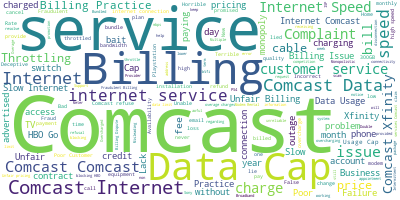

In [12]:
#Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['Customer Complaint'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=5, contour_color='grey')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    This will return a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vec_complaints = count_vectorizer.fit_transform(text_data.values)
    vec_total = np.sum(vec_complaints, axis=0)
    word_indices = np.flip(np.argsort(vec_total)[0,:], 1)
    word_values = np.flip(np.sort(vec_total)[0,:],1)
    
    word_vec = np.zeros((n_top_words, vec_complaints.shape[1]))
    for i in range(n_top_words):
        word_vec[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vec)]

    return (words, word_values[0,:n_top_words].tolist()[0])

count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['Customer Complaint'])

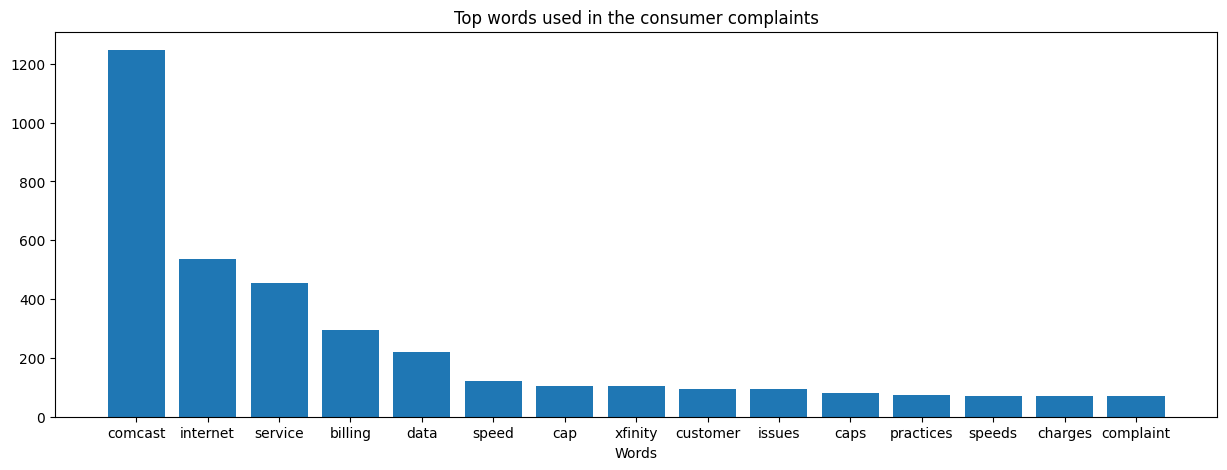

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='horizontal')
ax.set_title('Top words used in the consumer complaints')
ax.set_xlabel('Words')
plt.show()

# LDA

In [15]:
lda_model2 = gensim.models.LdaMulticore(corpus=bow_corpus, num_topics=6, id2word=dictionary, passes=20, workers=2)


In [16]:
lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                        num_topics = 6,
                                        id2word = dictionary,
                                        passes = 10,
                                        workers = 2,
                                       )

In [17]:
lda_model2.print_topics()

[(0,
  '0.347*"data" + 0.131*"cap" + 0.074*"usag" + 0.043*"overcharg" + 0.035*"limit" + 0.032*"problem" + 0.027*"avail" + 0.026*"overag" + 0.021*"help" + 0.019*"bandwidth"'),
 (1,
  '0.244*"servic" + 0.213*"bill" + 0.120*"issu" + 0.094*"custom" + 0.078*"complaint" + 0.021*"monopoli" + 0.019*"terribl" + 0.014*"horribl" + 0.013*"poor" + 0.010*"problem"'),
 (2,
  '0.122*"servic" + 0.041*"month" + 0.037*"advertis" + 0.037*"cancel" + 0.036*"fals" + 0.035*"refus" + 0.035*"decept" + 0.034*"busi" + 0.034*"charg" + 0.033*"provid"'),
 (3,
  '0.156*"bill" + 0.137*"practic" + 0.102*"unfair" + 0.080*"speed" + 0.036*"fraudul" + 0.032*"account" + 0.030*"charg" + 0.025*"high" + 0.022*"incorrect" + 0.020*"promis"'),
 (4,
  '0.174*"internet" + 0.114*"price" + 0.081*"throttl" + 0.068*"speed" + 0.067*"slow" + 0.062*"cabl" + 0.055*"connect" + 0.030*"phone" + 0.022*"block" + 0.021*"access"'),
 (5,
  '0.307*"internet" + 0.137*"servic" + 0.087*"xfiniti" + 0.085*"charg" + 0.071*"speed" + 0.027*"poor" + 0.024*"

In [18]:
lda_model.print_topics()

[(0,
  '0.332*"bill" + 0.128*"issu" + 0.089*"practic" + 0.072*"complaint" + 0.066*"unfair" + 0.060*"servic" + 0.025*"decept" + 0.023*"price" + 0.023*"monopoli" + 0.014*"fraudul"'),
 (1,
  '0.353*"servic" + 0.120*"custom" + 0.058*"internet" + 0.055*"poor" + 0.030*"phone" + 0.030*"overcharg" + 0.023*"terribl" + 0.022*"cancel" + 0.019*"price" + 0.019*"failur"'),
 (2,
  '0.204*"data" + 0.149*"internet" + 0.135*"speed" + 0.077*"cap" + 0.069*"throttl" + 0.052*"slow" + 0.043*"usag" + 0.020*"limit" + 0.018*"block" + 0.015*"avail"'),
 (3,
  '0.189*"charg" + 0.059*"price" + 0.045*"month" + 0.037*"bundl" + 0.033*"fee" + 0.032*"account" + 0.032*"lie" + 0.030*"servic" + 0.030*"increas" + 0.024*"equip"'),
 (4,
  '0.304*"internet" + 0.119*"servic" + 0.047*"connect" + 0.035*"problem" + 0.025*"fals" + 0.023*"advertis" + 0.022*"speed" + 0.021*"busi" + 0.021*"switch" + 0.020*"disconnect"'),
 (5,
  '0.160*"xfiniti" + 0.078*"cabl" + 0.054*"provid" + 0.050*"servic" + 0.046*"refus" + 0.038*"outag" + 0.034*"m

In [19]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.332*"bill" + 0.128*"issu" + 0.089*"practic" + 0.072*"complaint" + 0.066*"unfair" + 0.060*"servic" + 0.025*"decept" + 0.023*"price" + 0.023*"monopoli" + 0.014*"fraudul"


Topic: 1 
Words: 0.353*"servic" + 0.120*"custom" + 0.058*"internet" + 0.055*"poor" + 0.030*"phone" + 0.030*"overcharg" + 0.023*"terribl" + 0.022*"cancel" + 0.019*"price" + 0.019*"failur"


Topic: 2 
Words: 0.204*"data" + 0.149*"internet" + 0.135*"speed" + 0.077*"cap" + 0.069*"throttl" + 0.052*"slow" + 0.043*"usag" + 0.020*"limit" + 0.018*"block" + 0.015*"avail"


Topic: 3 
Words: 0.189*"charg" + 0.059*"price" + 0.045*"month" + 0.037*"bundl" + 0.033*"fee" + 0.032*"account" + 0.032*"lie" + 0.030*"servic" + 0.030*"increas" + 0.024*"equip"


Topic: 4 
Words: 0.304*"internet" + 0.119*"servic" + 0.047*"connect" + 0.035*"problem" + 0.025*"fals" + 0.023*"advertis" + 0.022*"speed" + 0.021*"busi" + 0.021*"switch" + 0.020*"disconnect"


Topic: 5 
Words: 0.160*"xfiniti" + 0.078*"cabl" + 0.054*"provid" + 0.050*"s

In [20]:
for idx, topic in lda_model2.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.347*"data" + 0.131*"cap" + 0.074*"usag" + 0.043*"overcharg" + 0.035*"limit" + 0.032*"problem" + 0.027*"avail" + 0.026*"overag" + 0.021*"help" + 0.019*"bandwidth"


Topic: 1 
Words: 0.244*"servic" + 0.213*"bill" + 0.120*"issu" + 0.094*"custom" + 0.078*"complaint" + 0.021*"monopoli" + 0.019*"terribl" + 0.014*"horribl" + 0.013*"poor" + 0.010*"problem"


Topic: 2 
Words: 0.122*"servic" + 0.041*"month" + 0.037*"advertis" + 0.037*"cancel" + 0.036*"fals" + 0.035*"refus" + 0.035*"decept" + 0.034*"busi" + 0.034*"charg" + 0.033*"provid"


Topic: 3 
Words: 0.156*"bill" + 0.137*"practic" + 0.102*"unfair" + 0.080*"speed" + 0.036*"fraudul" + 0.032*"account" + 0.030*"charg" + 0.025*"high" + 0.022*"incorrect" + 0.020*"promis"


Topic: 4 
Words: 0.174*"internet" + 0.114*"price" + 0.081*"throttl" + 0.068*"speed" + 0.067*"slow" + 0.062*"cabl" + 0.055*"connect" + 0.030*"phone" + 0.022*"block" + 0.021*"access"


Topic: 5 
Words: 0.307*"internet" + 0.137*"servic" + 0.087*"xfiniti" + 0.085

In [35]:
lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                        num_topics = 6,
                                        id2word = dictionary,
                                        passes = 10,
                                        workers = 2,
                                       )
coherence_model = CoherenceModel(model=lda_model, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score of LDA', coherence_score)

Coherence Score of LDA 0.5863421669129872


In [34]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.130433  0.044489       1        1  26.706942
2      0.098618 -0.015112       2        1  15.869023
0     -0.286087 -0.170464       3        1  14.999379
3     -0.012594  0.332767       4        1  14.998640
5      0.223789 -0.143747       5        1  14.768613
4      0.106706 -0.047934       6        1  12.657402, topic_info=         Term        Freq       Total Category  logprob  loglift
10       data  213.000000  213.000000  Default  30.0000  30.0000
22       bill  295.000000  295.000000  Default  29.0000  29.0000
5      servic  464.000000  464.000000  Default  28.0000  28.0000
48    xfiniti  106.000000  106.000000  Default  27.0000  27.0000
9       charg  138.000000  138.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
10       data   36.141719  213.582000   Topic6  -2.8542   0.2904
1    internet   48.788062  501.931750   Topic6  -2.5541  -0.2641
105      home    6.545927   17.390996   Topic6  -4.5628   1.0898
5      servic   10.764139  464.264413   Topic6  -4.0654  -1.6973
43   contract    5.815628   31.047934   Topic6  -4.6811   0.3919

[247 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
25        2  0.048301   access
25        4  0.627907   access
25        5  0.144902   access
25        6  0.193202   access
82        3  0.195735  account
...     ...       ...      ...
8         4  0.267470     work
128       6  0.912462    wrong
48        3  0.984296  xfiniti
67        1  0.059296     year
67        5  0.889436     year

[379 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 4, 6, 5])

In [22]:
coherence_model = CoherenceModel(model=lda_model2, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence Score of LDA', coherence_score)

Coherence Score of LDA 0.5536621280702662


In [23]:
# Calculate the coherence score when you have a different number of topics
for i in range(2,11):
    lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                        num_topics = i,
                                        id2word = dictionary,
                                        passes = 10,
                                        workers = 2,
                                       )
    coherence_model = CoherenceModel(model=lda_model, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} Topics: {}'.format(i, coherence_score))

Coherence score with 2 Topics: 0.462153387430584
Coherence score with 3 Topics: 0.540902204368449
Coherence score with 4 Topics: 0.5141329898729146
Coherence score with 5 Topics: 0.5811056441316376
Coherence score with 6 Topics: 0.5713066817895474
Coherence score with 7 Topics: 0.5800986555022664
Coherence score with 8 Topics: 0.5930607627077773
Coherence score with 9 Topics: 0.6034209490146754
Coherence score with 10 Topics: 0.5816627465630223


In [24]:
# Calculate the coherence score when you have a different number of topics
for i in range(2,11):
    lda_model2 = gensim.models.LdaMulticore(corpus=bow_corpus, num_topics=i, id2word=dictionary, passes=20, workers=2)
    coherence_model = CoherenceModel(model=lda_model2, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} Topics: {}'.format(i, coherence_score))

Coherence score with 2 Topics: 0.5057491695274339
Coherence score with 3 Topics: 0.5681616700577932
Coherence score with 4 Topics: 0.5742044823266331
Coherence score with 5 Topics: 0.5628006858276499
Coherence score with 6 Topics: 0.5948523096411361
Coherence score with 7 Topics: 0.5709240943410246
Coherence score with 8 Topics: 0.5905939938072587
Coherence score with 9 Topics: 0.6039152430185493
Coherence score with 10 Topics: 0.6101156856203007


In [26]:
# Dominant Topics

In [52]:
def format_topics_sentences(ldamodel=None, corpus=bow_corpus, texts=processed_docs):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list

        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)

        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=processed_docs)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.7911,"internet, servic, speed, price, phone, bundl, ...","[comcast, cabl, internet, speed]"
1,1,2.0,0.7905,"bill, xfiniti, servic, problem, account, provi...","[payment, disappear, servic, disconnect]"
2,2,4.0,0.7214,"servic, speed, custom, poor, issu, pay, slow, ...","[speed, servic]"
3,3,3.0,0.7217,"data, issu, cap, usag, bill, lie, limit, conti...","[comcast, impos, usag, punish, stream]"
4,4,1.0,0.7207,"internet, servic, speed, price, phone, bundl, ...","[comcast, work, servic, boot]"
5,5,0.0,0.4622,"charg, internet, servic, throttl, slow, cabl, ...","[charg, arbitrari, data, limit, overag, fee]"
6,6,3.0,0.4383,"data, issu, cap, usag, bill, lie, limit, conti...","[throttl, servic, unreason, data, cap]"
7,7,4.0,0.7908,"servic, speed, custom, poor, issu, pay, slow, ...","[comcast, refus, help, troubleshoot, correct, ..."
8,8,1.0,0.5833,"internet, servic, speed, price, phone, bundl, ...","[comcast, extend, outag]"
9,9,1.0,0.7907,"internet, servic, speed, price, phone, bundl, ...","[comcast, rais, price, avail]"


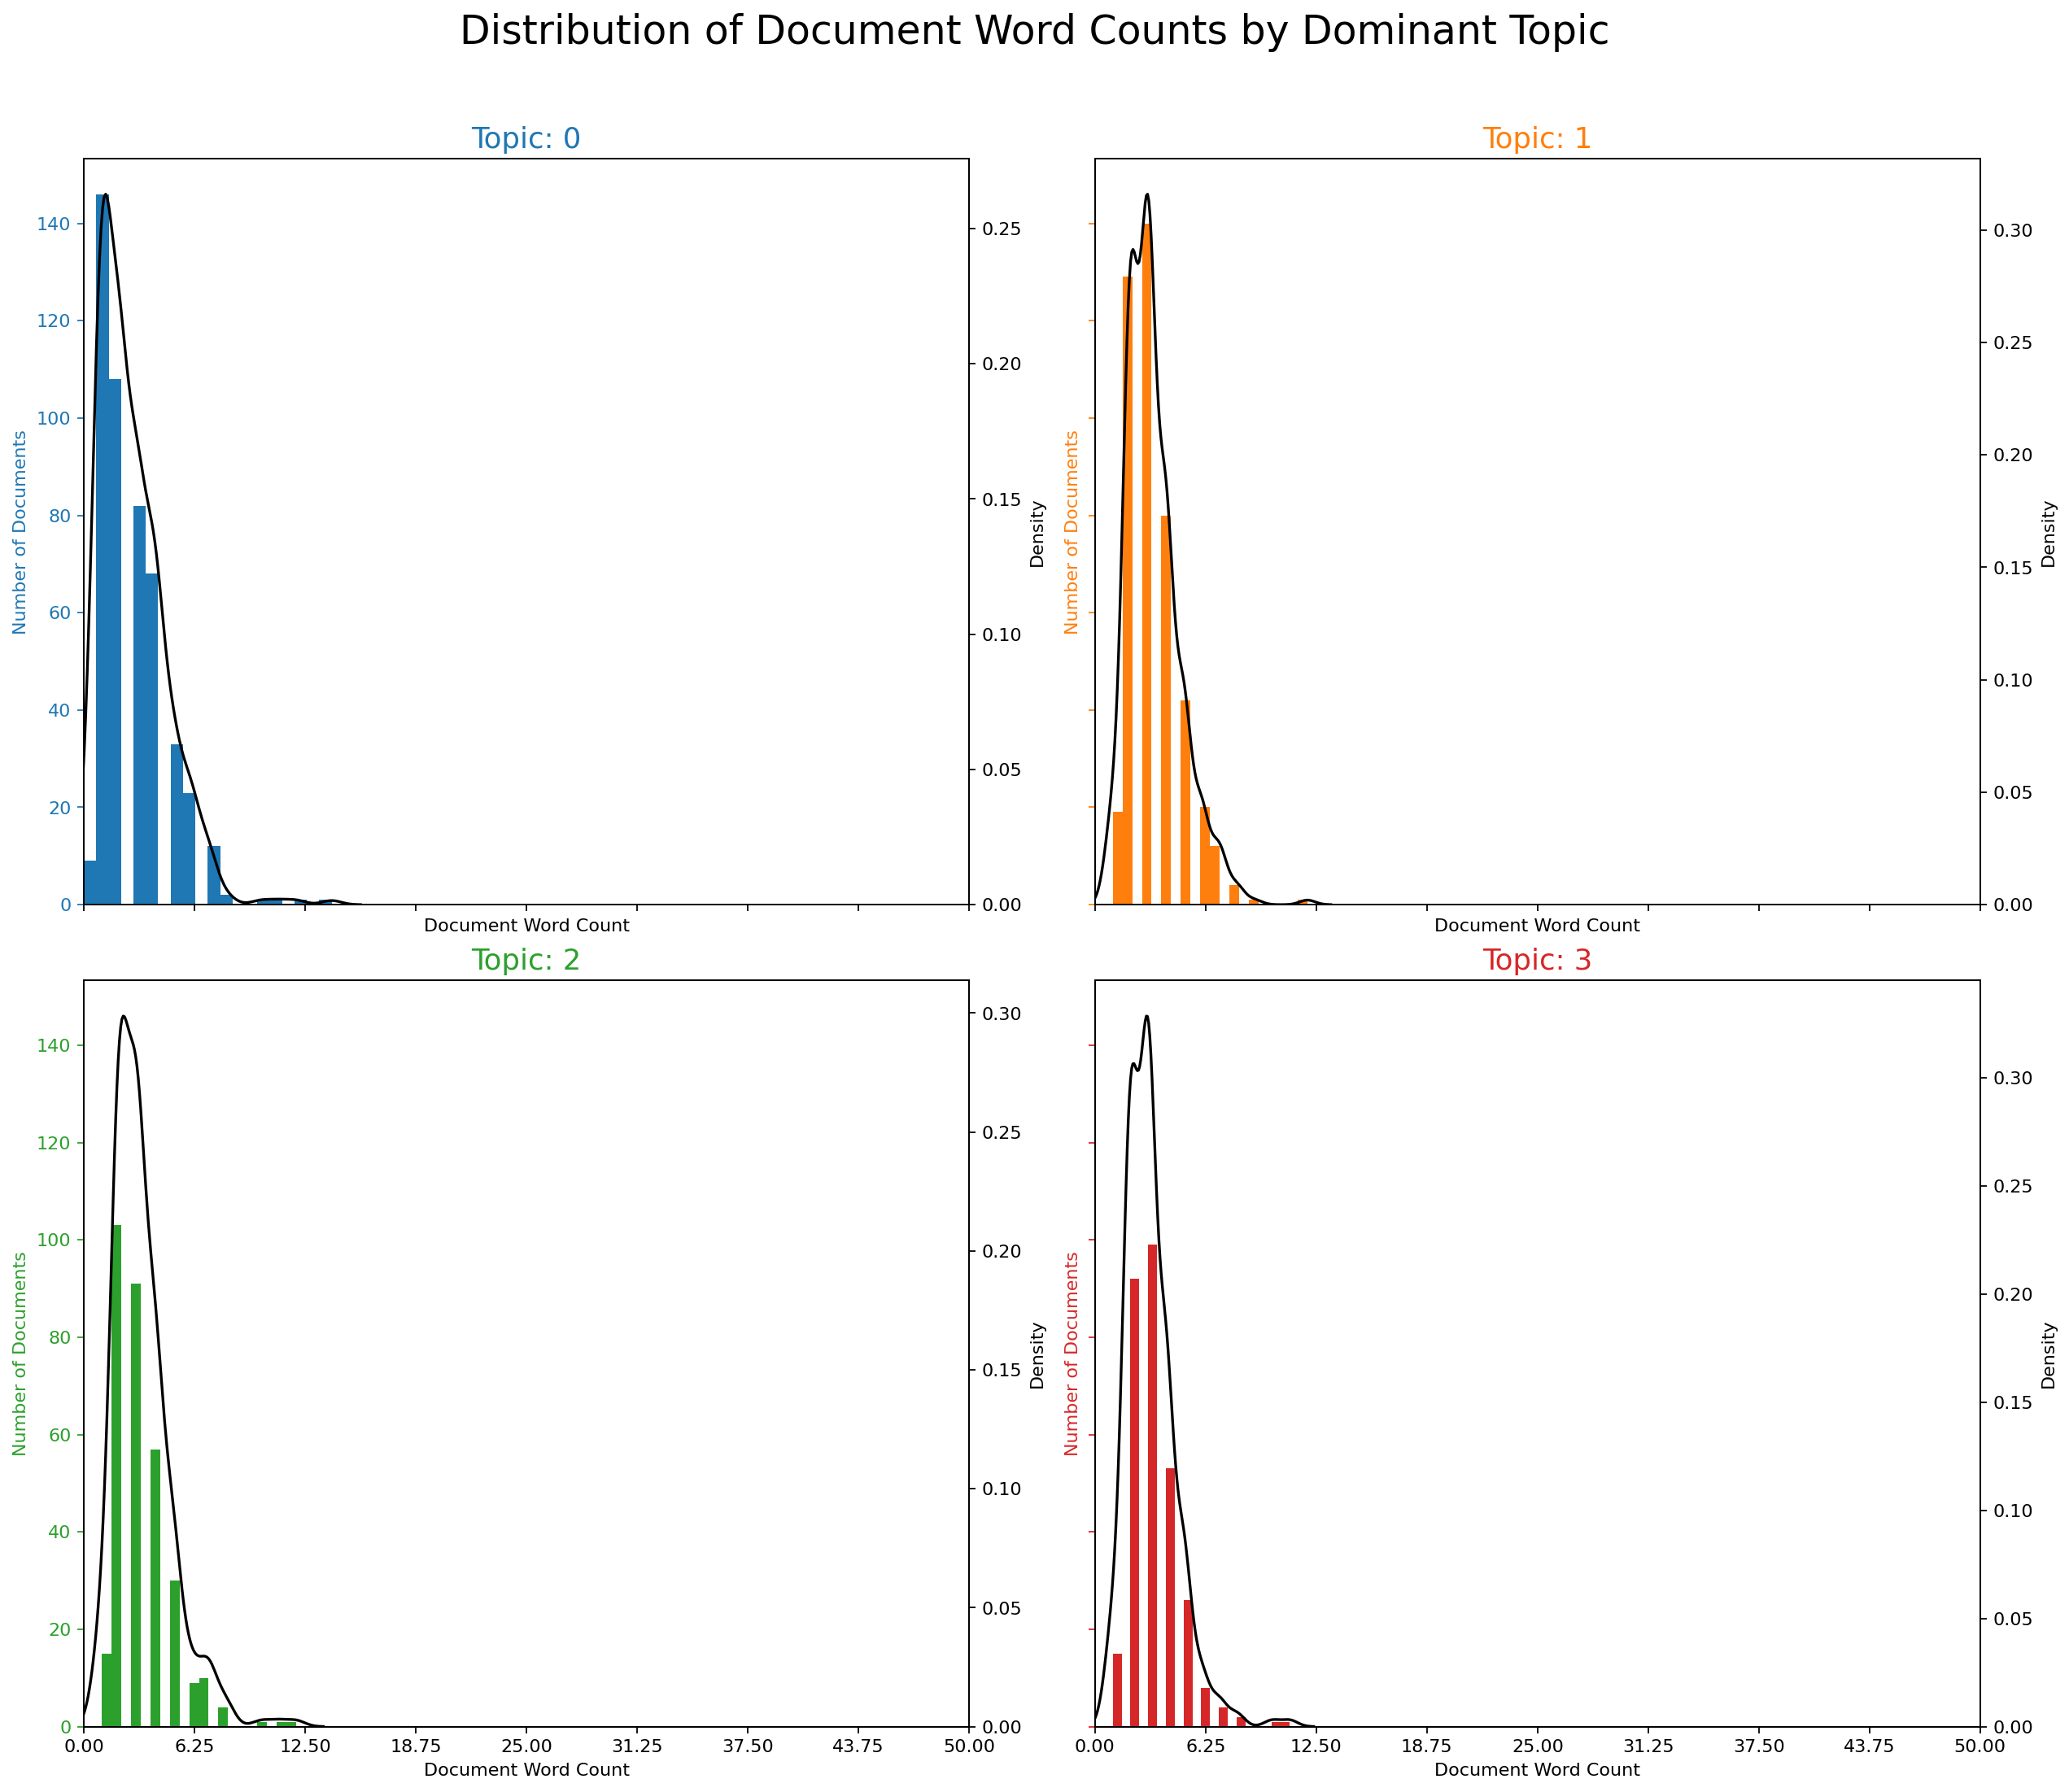

In [53]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 20, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 20), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,50,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(5,7), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# LSA

In [44]:
lsi = LsiModel(bow_corpus, num_topics=6, id2word=dictionary)

In [45]:
# from sklearn.decomposition import TruncatedSVD

# # SVD represent documents and terms in vectors 
# svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

# svd_model.fit(text_tfidf)

# len(svd_model.components_)

In [46]:
# svd_model.components_

In [47]:
for topic_num, words in lsi.print_topics(num_words=6):
    print('Words in topic {}: {}.'.format(topic_num, words))

Words in topic 0: 0.677*"servic" + 0.645*"internet" + 0.197*"bill" + 0.164*"speed" + 0.122*"custom" + 0.094*"issu".
Words in topic 1: -0.675*"internet" + 0.607*"servic" + -0.252*"speed" + 0.239*"bill" + 0.150*"custom" + -0.080*"slow".
Words in topic 2: -0.870*"bill" + 0.322*"servic" + -0.228*"practic" + -0.188*"issu" + -0.153*"unfair" + -0.109*"data".
Words in topic 3: 0.886*"data" + 0.376*"cap" + 0.169*"usag" + 0.108*"charg" + -0.106*"bill" + 0.073*"limit".
Words in topic 4: 0.897*"speed" + -0.321*"internet" + 0.158*"throttl" + 0.116*"charg" + 0.088*"advertis" + 0.083*"slow".
Words in topic 5: 0.939*"charg" + 0.136*"price" + -0.112*"speed" + 0.107*"modem" + -0.094*"data" + -0.089*"cap".


In [50]:
coherence_model = CoherenceModel(model=lsi, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print('Coherence score of lsi model: ', coherence_score)

Coherence score of lsi model:  0.6374963502389223


In [51]:
# Calculate the coherence score when you have a different number of topics
for i in range(2,11):
    lsi = LsiModel(bow_corpus, num_topics=i, id2word=dictionary)
    coherence_model = CoherenceModel(model=lsi, texts=df['Text (Clean)'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    print('Coherence score with {} Topics: {}'.format(i, coherence_score))

Coherence score with 2 Topics: 0.4959791890319664
Coherence score with 3 Topics: 0.5221123985963007
Coherence score with 4 Topics: 0.5298777511430419
Coherence score with 5 Topics: 0.5492453707637626
Coherence score with 6 Topics: 0.5989540033794403
Coherence score with 7 Topics: 0.5483408284726377
Coherence score with 8 Topics: 0.542052703098808
Coherence score with 9 Topics: 0.5199603470940748
Coherence score with 10 Topics: 0.5188558153330776


In [78]:
lsi.show_topic(0),lsi.show_topic(1)

([('servic', 0.6773667633027544),
  ('internet', 0.6451684352289822),
  ('bill', 0.1971225994843129),
  ('speed', 0.1643311392232106),
  ('custom', 0.12161819916623617),
  ('issu', 0.0944712568318272),
  ('poor', 0.05866383701854045),
  ('slow', 0.05563306641319555),
  ('charg', 0.04833786314443096),
  ('price', 0.04629966876834605)],
 [('internet', -0.6753940011750866),
  ('servic', 0.607332208499062),
  ('speed', -0.2524527419470561),
  ('bill', 0.23934890352845417),
  ('custom', 0.15037048947611478),
  ('slow', -0.07967656013816525),
  ('issu', 0.0725064512200044),
  ('throttl', -0.06579335270602993),
  ('poor', 0.04217053689504578),
  ('connect', -0.04089736929561796)])

# NMF

In [ ]:
#obtain a NMF model.
from sklearn.decomposition import NMF
nmf = NMF(n_components=6, init='nndsvd')

In [ ]:
#fit the model
from sklearn.preprocessing import normalize
xtfidf_norm = normalize(text_tfidf, norm='l2', axis=1)
nmf.fit(xtfidf_norm)

In [ ]:
def get_nmf_topics(model):
    
    #the word ids obtained need to be reverse-mapped to the words so we can print the topic names.
    feat_names = vectorizer.get_feature_names_out()
    
    word_dict = {};
    n_topics=6
    for i in range(n_topics):
        
        #for each topic, obtain the largest values, and add the words they map to into the dictionary.
        words_ids = model.components_[i].argsort()[:-10 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict);
get_nmf_topics(nmf)